In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
train = pd.read_csv("E:/DS Courses/Edwisor/Project 3/Train_data.csv")
test = pd.read_csv("E:/DS Courses/Edwisor/Project 3/Test_data.csv")

data = pd.concat([train,test])

data.shape

(5000, 21)

In [130]:
print(len(train.Churn))
print(len(test.Churn))

3333
1667


In [131]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [132]:
data.columns = ['state', 'loyalty', 'a_code','contact', 'intl_plan', 'vm_plan', 'n_vm_mesg',
               'min_day','calls_day', 'chrg_day', 'min_eve', 'calls_eve','chrg_eve', 'mins_nit',
                'calls_nit', 'chrg_nit', 'mins_intl', 'calls_intl', 'chrg_intl', 'n_cs_calls', 'churn']

In [133]:
data.dtypes

state          object
loyalty         int64
a_code          int64
contact        object
intl_plan      object
vm_plan        object
n_vm_mesg       int64
min_day       float64
calls_day       int64
chrg_day      float64
min_eve       float64
calls_eve       int64
chrg_eve      float64
mins_nit      float64
calls_nit       int64
chrg_nit      float64
mins_intl     float64
calls_intl      int64
chrg_intl     float64
n_cs_calls      int64
churn          object
dtype: object

In [134]:
data.describe()

,loyalty,a_code,n_vm_mesg,min_day,calls_day,chrg_day,min_eve,calls_eve,chrg_eve,mins_nit,calls_nit,chrg_nit,mins_intl,calls_intl,chrg_intl,n_cs_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [135]:
data.head()

,state,loyalty,a_code,contact,intl_plan,vm_plan,n_vm_mesg,min_day,calls_day,chrg_day,...,calls_eve,chrg_eve,mins_nit,calls_nit,chrg_nit,mins_intl,calls_intl,chrg_intl,n_cs_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [136]:
data.churn = data.churn.str.replace(' False.', 'No')
data.churn = data.churn.str.replace(' True.', 'Yes')

In [137]:
data.describe()

,loyalty,a_code,n_vm_mesg,min_day,calls_day,chrg_day,min_eve,calls_eve,chrg_eve,mins_nit,calls_nit,chrg_nit,mins_intl,calls_intl,chrg_intl,n_cs_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# MISSING VALUE ANALYSIS

In [138]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
churn,0,0.0
chrg_day,0,0.0
loyalty,0,0.0
a_code,0,0.0
contact,0,0.0
intl_plan,0,0.0
vm_plan,0,0.0
n_vm_mesg,0,0.0
min_day,0,0.0
calls_day,0,0.0


In [139]:
print(data[data.churn == 'No'].count()[1])
print(data[data.churn == 'Yes'].count()[1])

4293
707


*********** Class Distribution in Churn ***********
No     4293
Yes     707
Name: churn, dtype: int64


*********** Percentage Class Distribution ***********
No     85.86
Yes    14.14
Name: churn, dtype: float64


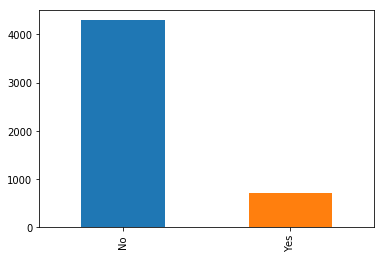

In [140]:
print('*********** Class Distribution in Churn ***********')
print(data['churn'].value_counts())
print('\n\n*********** Percentage Class Distribution ***********')
print(data['churn'].value_counts(normalize= True)*100)
data['churn'].value_counts().plot.bar()

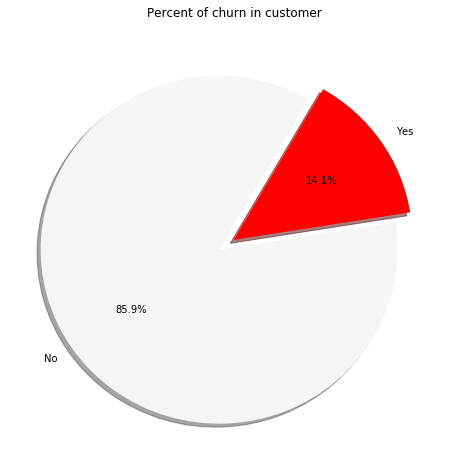

In [141]:
from pylab import rcParams
# Data to plot
labels =data['churn'].value_counts(sort = True).index
sizes = data['churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60,)

plt.title('Percent of churn in customer')
plt.show()

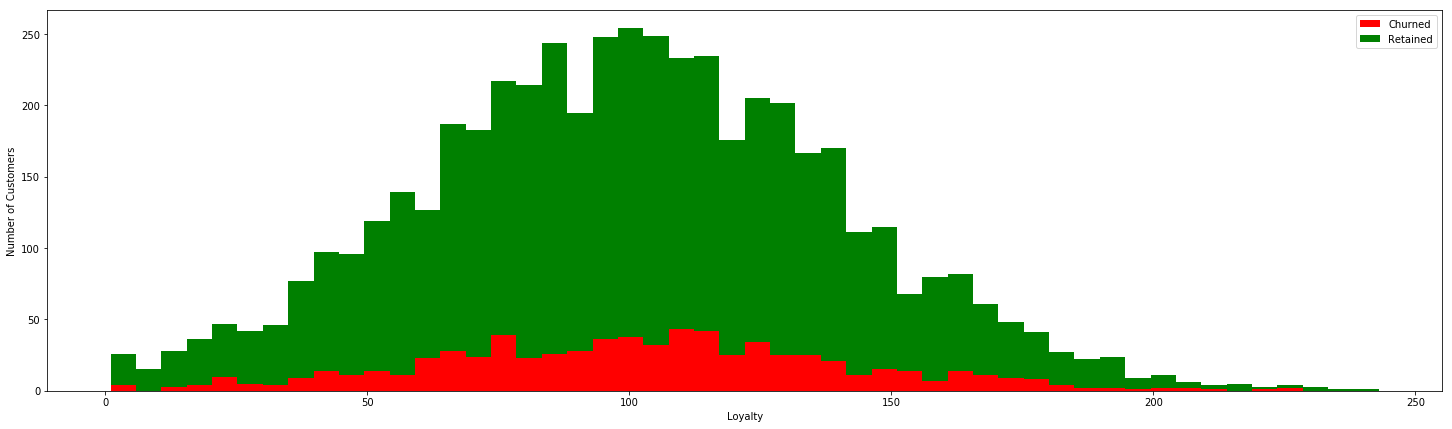

In [142]:

figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['churn'] == 'Yes']['loyalty'], data[data['churn'] == 'No']['loyalty']], 
         stacked=True, color = ['r','g'],
         bins = 50, label = ['Churned','Retained'])
plt.xlabel('Loyalty')
plt.ylabel('Number of Customers')
plt.legend();

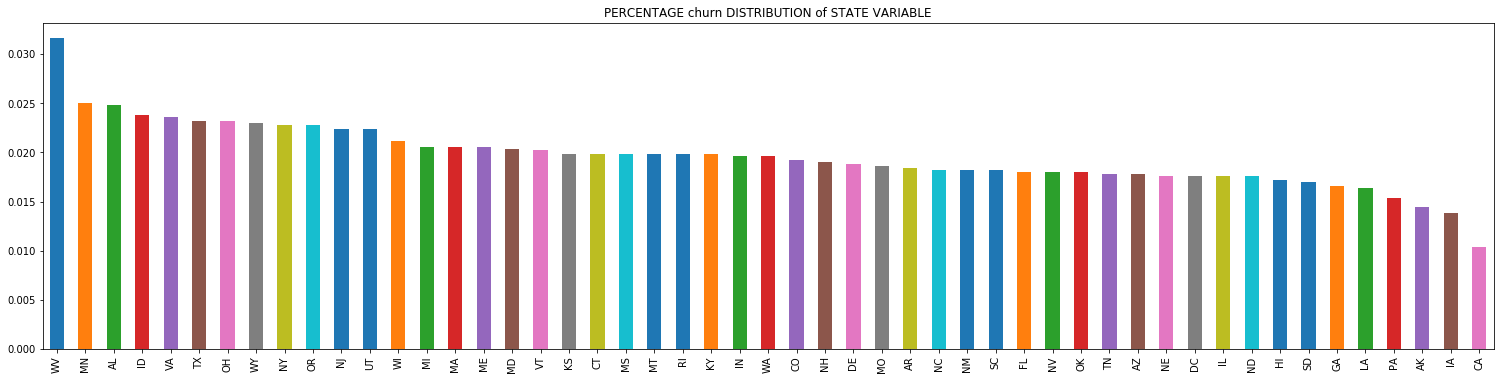

In [143]:
data['state'].value_counts(normalize= True).plot.bar(figsize= (26,6), title= 'PERCENTAGE churn DISTRIBUTION of STATE VARIABLE')

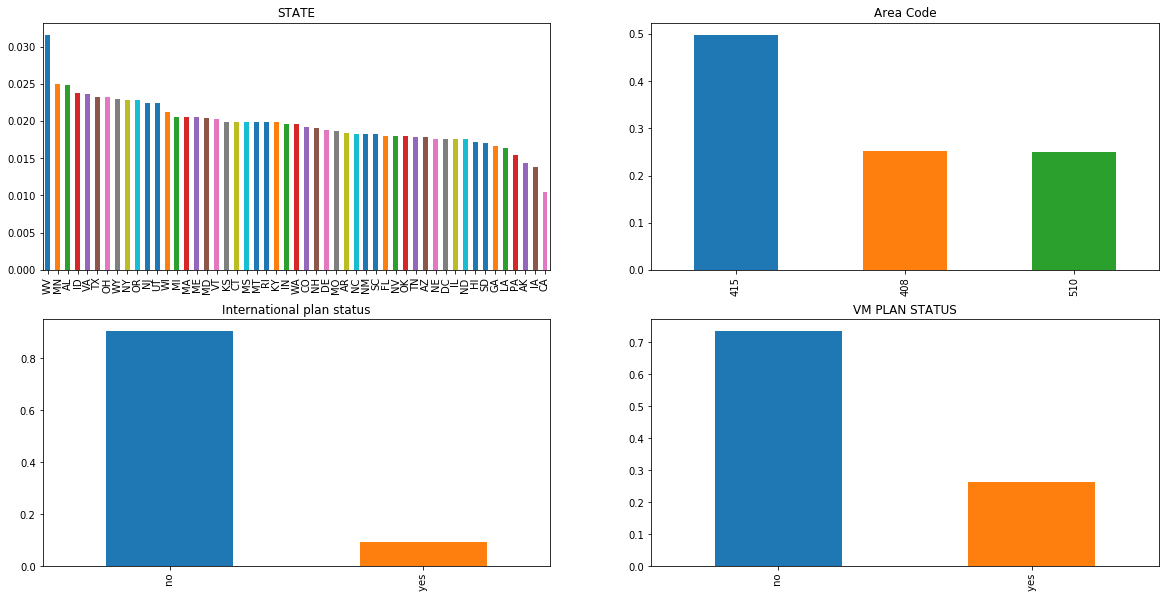

In [144]:
###### Dropping the contact variable
data.drop('contact', axis= 1)

##### Converting the area code variable #####
data.a_code = data.a_code.astype('object')

plt.figure(1)
plt.subplot(221)
data['state'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'STATE')

plt.subplot(222)
data['a_code'].value_counts(normalize=True).plot.bar(title= 'Area Code')

plt.subplot(223)
data['intl_plan'].value_counts(normalize=True).plot.bar(title= 'International plan status')

plt.subplot(224)
data['vm_plan'].value_counts(normalize=True).plot.bar(title= 'VM PLAN STATUS')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


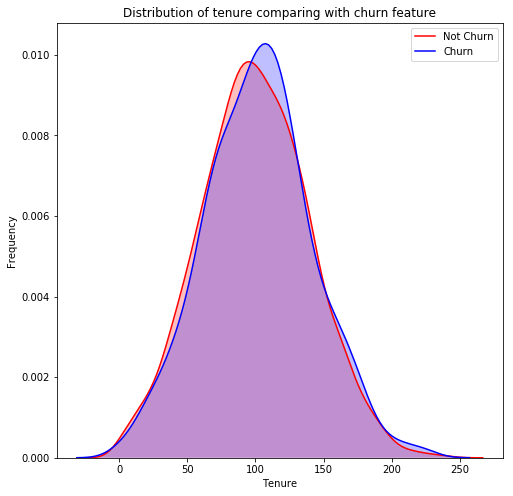

In [145]:
# tenure distibution 
g = sns.kdeplot(data.loyalty[(data["churn"] == 'No') ], color="Red", shade = True)
g = sns.kdeplot(data.loyalty[(data["churn"] == 'Yes') ], ax =g, color="Blue", shade= True)
g.set_xlabel("Tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


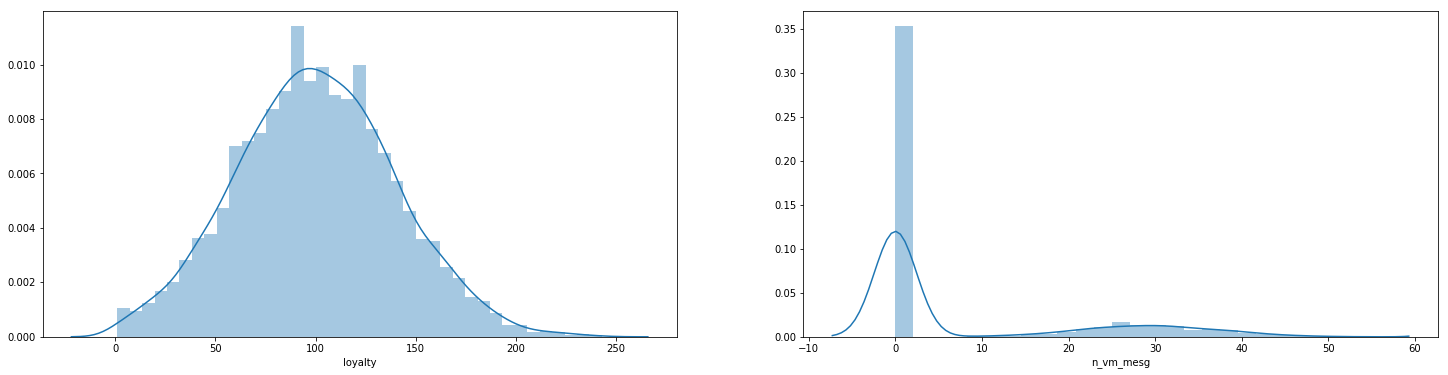

In [146]:
plt.figure(1, figsize=(25,6))
plt.subplot(121)
sns.distplot(data['loyalty']);
plt.subplot(122)
sns.distplot(data['n_vm_mesg'], bins= 25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


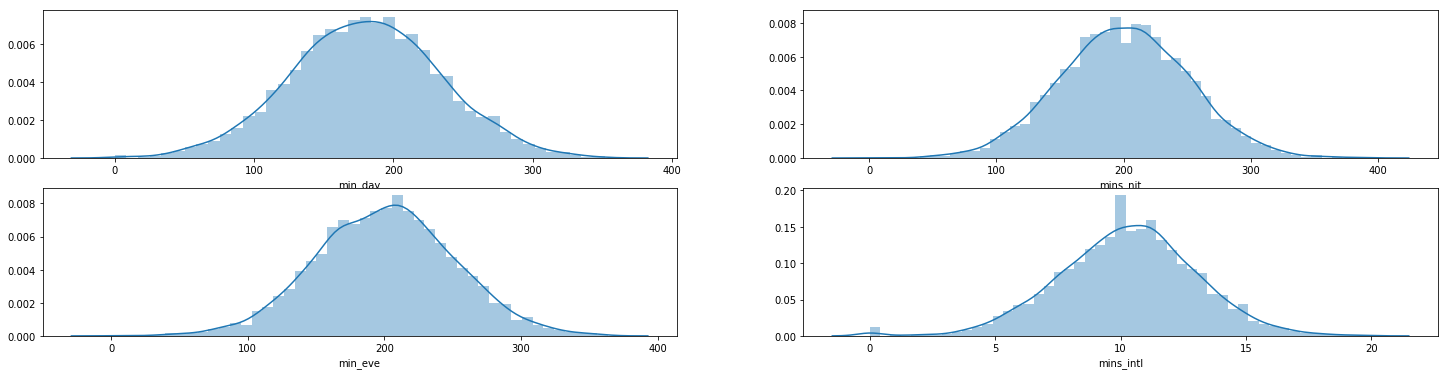

In [147]:
plt.figure(1, figsize=(25,6))
plt.subplot(221)
sns.distplot(data['min_day'])

plt.subplot(222)
sns.distplot(data['mins_nit'])

plt.subplot(223)
sns.distplot(data['min_eve'])

plt.subplot(224)
sns.distplot(data['mins_intl'])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


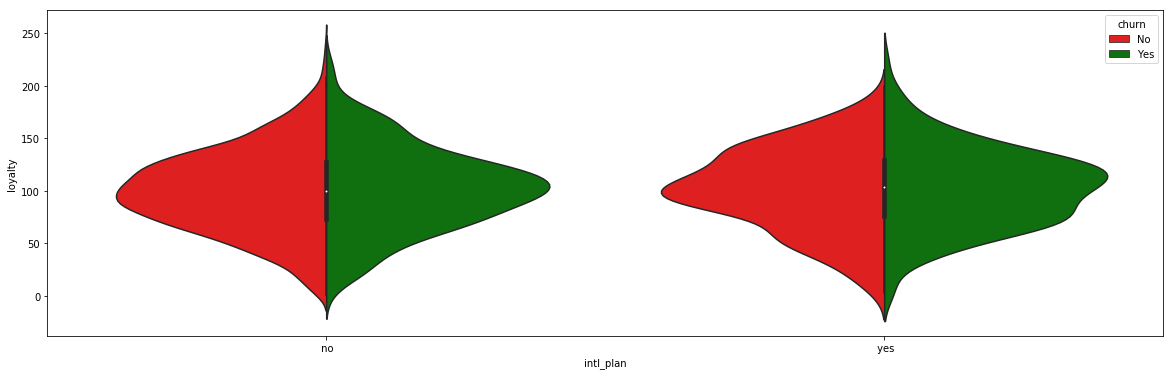

In [148]:
fig = plt.figure(figsize=(20, 6))
sns.violinplot(x='intl_plan', y='loyalty', 
               hue='churn', data=data, 
               split=True,
               palette={'No': "r", 'Yes': "g"}
              );

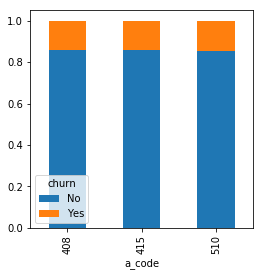

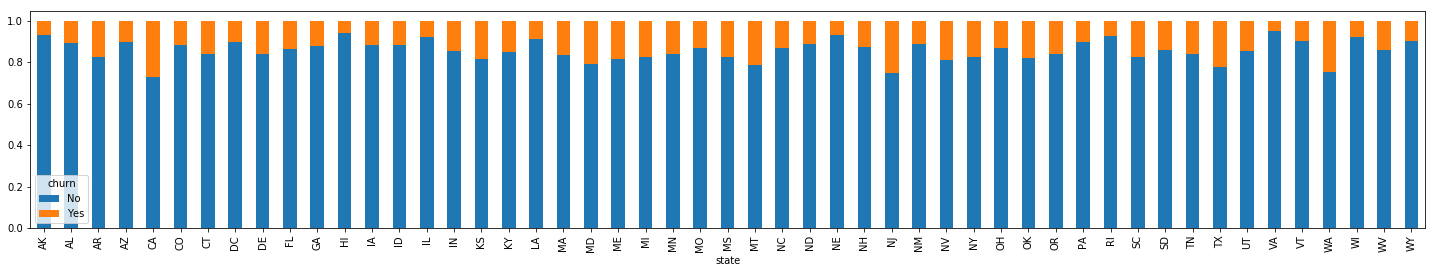

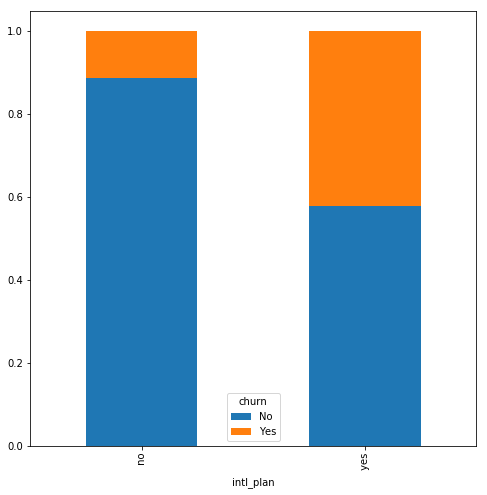

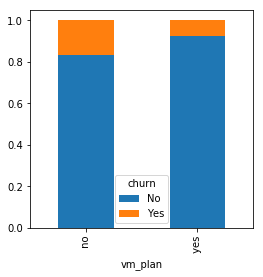

In [149]:
st_var=pd.crosstab(data['state'],data['churn'])
int_var  =pd.crosstab(data['intl_plan'],data['churn'])
vm_var =pd.crosstab(data['vm_plan'],data['churn'])
area=pd.crosstab(data['a_code'],data['churn'])

area.div(area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

st_var.div(st_var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(25,4))
plt.show()

int_var.div(int_var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

vm_var.div(vm_var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


# OUTLIER DETECTION

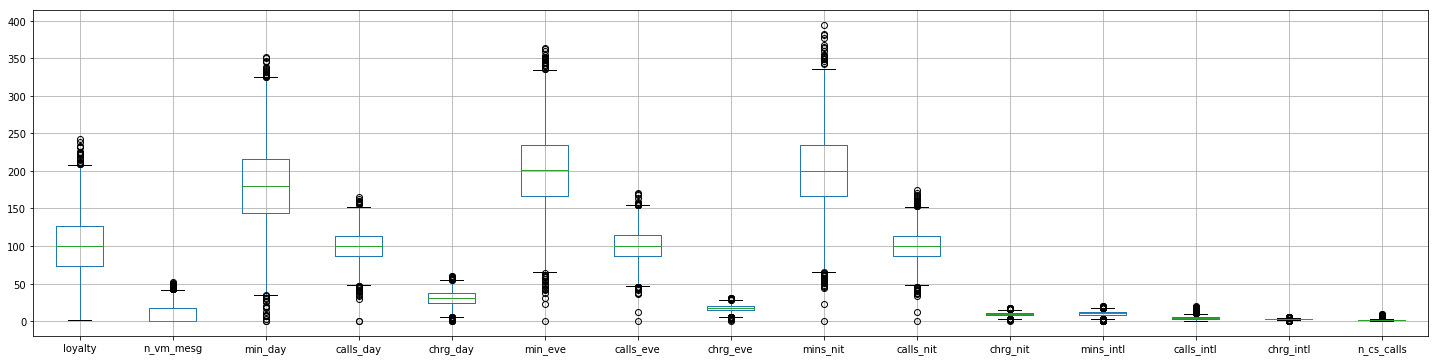

In [151]:
f= plt.figure(figsize=(25,6))
cnames= ['loyalty', 'n_vm_mesg', 'min_day', 'calls_day', 'chrg_day', 'min_eve', 'calls_eve',
       'chrg_eve', 'mins_nit', 'calls_nit', 'chrg_nit', 'mins_intl','calls_intl', 'chrg_intl', 'n_cs_calls']
boxplot = data.boxplot(cnames)

In [283]:
del(dfff)
for i in cnames:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    lower = q25- (iqr*1.5)
    upper = q75+ (iqr*1.5)
    data.loc[data[i]<lower,:i]= np.nan
    data.loc[data[i]>upper,:i]= np.nan

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [284]:
out_d= pd.DataFrame((data.isnull().sum()).sort_values(ascending=False))
out_d['features'] = out_d.index
out_d= out_d.reset_index(drop= True)
out_d.columns = ['No.of outliers deleted','features']
out_d['perc'] = out_d['No.of outliers deleted']*100/5000
out_d

,No.of outliers deleted,features,perc
0,399,n_cs_calls,7.98
1,118,calls_intl,2.36
2,72,chrg_intl,1.44
3,72,mins_intl,1.44
4,60,n_vm_mesg,1.20
5,43,min_eve,0.86
6,43,calls_nit,0.86
7,42,chrg_eve,0.84
8,39,mins_nit,0.78
9,39,chrg_nit,0.78


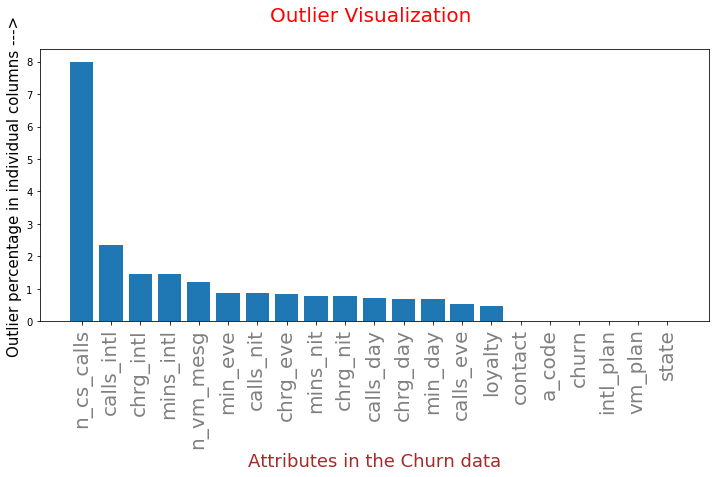

In [285]:
label = out_d.features
t_abs =  out_d.perc
index = np.arange(len(out_d))-1
plt.figure(figsize=(12,5))
plt.bar(index, t_abs)
plt.xlabel('Attributes in the Churn data', fontsize=18, color= 'brown')
plt.ylabel('Outlier percentage in individual columns --->', fontsize=15)
plt.xticks(index, label, fontsize=20, rotation=90, color= 'grey')
plt.title('Outlier Visualization \n', color = 'red', fontsize= 20)
plt.show()

In [303]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
imputer= imputer.fit(data.loc[:,cnames])
data.loc[:,cnames]= imputer.transform(data.loc[:,cnames])
data.isnull().sum()

state         0
loyalty       0
a_code        0
contact       0
intl_plan     0
vm_plan       0
n_vm_mesg     0
min_day       0
calls_day     0
chrg_day      0
min_eve       0
calls_eve     0
chrg_eve      0
mins_nit      0
calls_nit     0
chrg_nit      0
mins_intl     0
calls_intl    0
chrg_intl     0
n_cs_calls    0
churn         0
dtype: int64

# CORRELATION

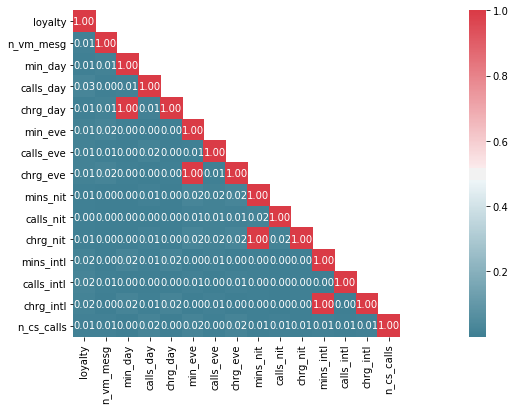

In [305]:
cor_features = ['loyalty','n_vm_mesg', 'min_day', 'calls_day', 'chrg_day', 'min_eve', 'calls_eve',
       'chrg_eve', 'mins_nit', 'calls_nit', 'chrg_nit', 'mins_intl','calls_intl', 'chrg_intl', 'n_cs_calls']

df_con = data.loc[:,cor_features]

f, ax = plt.subplots(figsize=(25,6))
corr = df_con.corr().abs()

# Select upper triangle of correlation matrix
lower = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))

sns.heatmap(lower,mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True), square = True, annot=True, fmt=".2f", ax = ax)
plt.show()

# FEATURE SELECTION

## Using Random Forest for Feature Selection

In [306]:
data.churn = data.churn.str.replace('No', '0')
data.churn = data.churn.str.replace('Yes', '1')

area_c = pd.get_dummies(data['a_code'],drop_first=True)
state_d = pd.get_dummies(data['state'],drop_first=True)
inpl = pd.get_dummies(data['intl_plan'],drop_first=True)
vmpl = pd.get_dummies(data['vm_plan'],drop_first=True)
df = pd.concat([data,area_c,state_d,inpl,vmpl], axis=1)
df = df.drop(['state', 'contact','a_code','intl_plan','vm_plan'], axis= 1)

In [362]:
## Seperating features and target
X= df.drop('churn', axis= 1)
y= df['churn']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)

from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
a_rf= round(scores.mean()*100,2)
print('Accuracy= '+ format(a_rf)+'%')
print("Standard deviation= "+format(round(scores.std()*100,2))+"%")

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,Y_prediction))
print(classification_report(y_test,Y_prediction))

Accuracy= 91.77%
Standard deviation= 0.84%
[[1291    2]
 [ 110   97]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      1293
          1       0.98      0.47      0.63       207

avg / total       0.93      0.93      0.91      1500



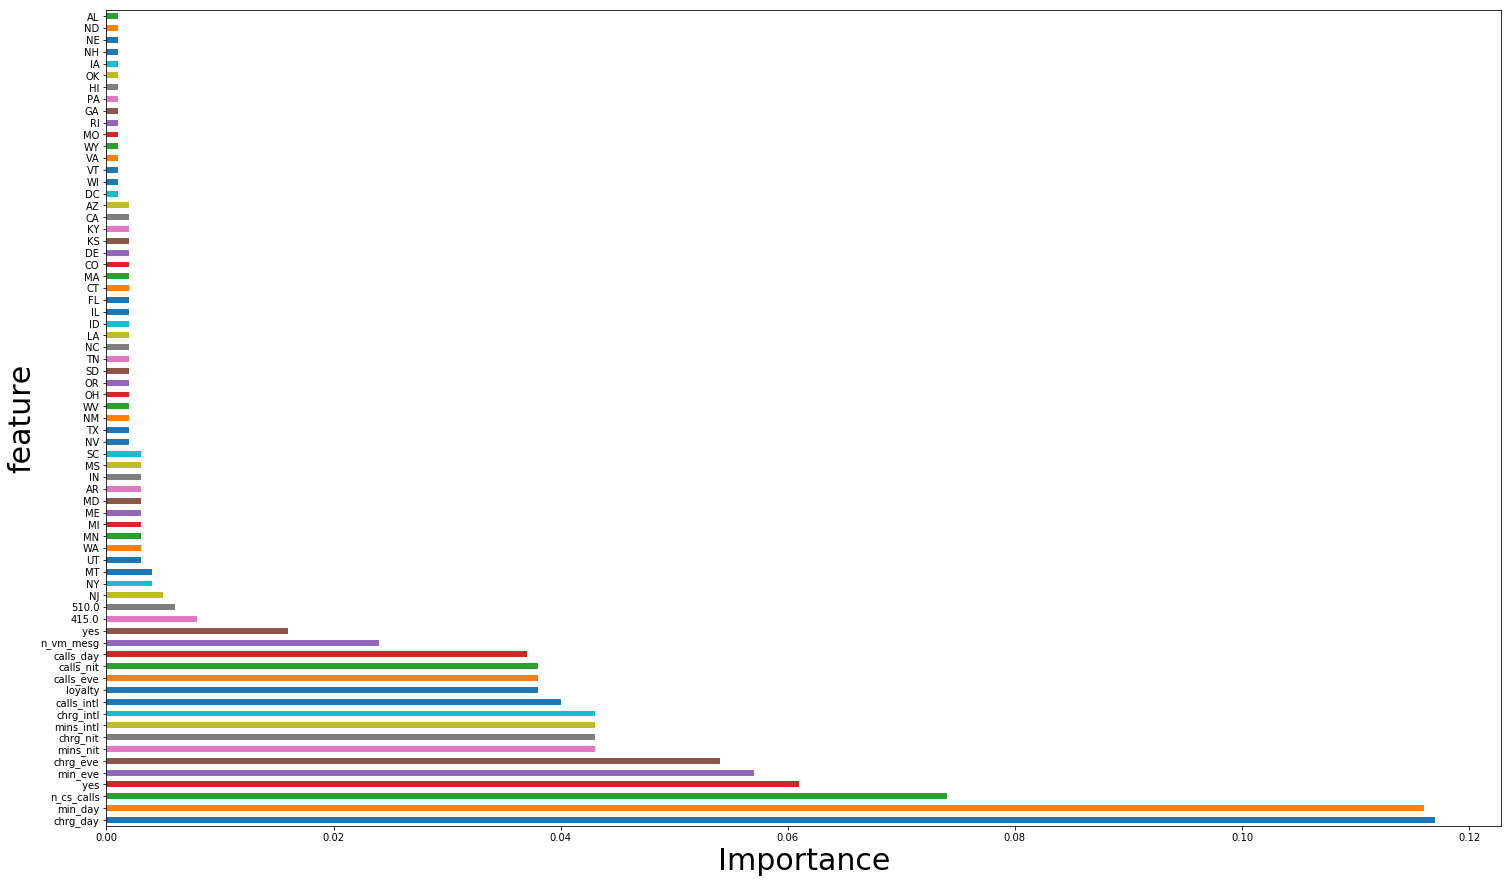

In [310]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

f = plt.figure(figsize = (25,15))
plt.xlabel("Importance", fontsize= 30)
plt.ylabel("FEATURES ", fontsize= 30)
importances['importance'].plot(kind = 'barh')

In [363]:
X.columns

Index([   'loyalty',  'n_vm_mesg',    'min_day',  'calls_day',   'chrg_day',
          'min_eve',  'calls_eve',   'chrg_eve',   'mins_nit',  'calls_nit',
         'chrg_nit',  'mins_intl', 'calls_intl',  'chrg_intl', 'n_cs_calls',
              415.0,        510.0,         'AL',         'AR',         'AZ',
               'CA',         'CO',         'CT',         'DC',         'DE',
               'FL',         'GA',         'HI',         'IA',         'ID',
               'IL',         'IN',         'KS',         'KY',         'LA',
               'MA',         'MD',         'ME',         'MI',         'MN',
               'MO',         'MS',         'MT',         'NC',         'ND',
               'NE',         'NH',         'NJ',         'NM',         'NV',
               'NY',         'OH',         'OK',         'OR',         'PA',
               'RI',         'SC',         'SD',         'TN',         'TX',
               'UT',         'VA',         'VT',         'WA',         'WI',

In [364]:
X= X.drop(['AL',         'AR',         'AZ',
               'CA',         'CO',         'CT',         'DC',         'DE',
               'FL',         'GA',         'HI',         'IA',         'ID',
               'IL',         'IN',         'KS',         'KY',         'LA',
               'MA',         'MD',         'ME',         'MI',         'MN',
               'MO',         'MS',         'MT',         'NC',         'ND',
               'NE',         'NH',         'NJ',         'NM',         'NV',
               'NY',         'OH',         'OK',         'OR',         'PA',
               'RI',         'SC',         'SD',         'TN',         'TX',
               'UT',         'VA',         'VT',         'WA',         'WI',
               'WV',         'WY'], axis= 1)
y= df['churn']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state= 42)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
a_rf = scores.mean()*100


In [365]:
print("Accuracy = "+format(round(a_rf,2)) +'%')
print("\nStd. Dev.= "+format(round(scores.std()*100,2)) +'%')

print(classification_report(y_test,Y_prediction))
print('\n'+format(confusion_matrix(y_test, Y_prediction)))

Accuracy = 94.0%

Std. Dev.= 0.83%
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      1293
          1       0.98      0.62      0.76       207

avg / total       0.95      0.95      0.94      1500


[[1291    2]
 [  79  128]]


In [377]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_prediction).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("sensitivity: ",round(sensitivity*100,4),"%")
print("specificity: ", round(specificity*100,4),"%")
print("Fall out ratio: ", round((100-(specificity*100)),4),"%")

sensitivity:  61.8357 %
specificity:  99.8453 %
Fall out ratio:  0.1547 %


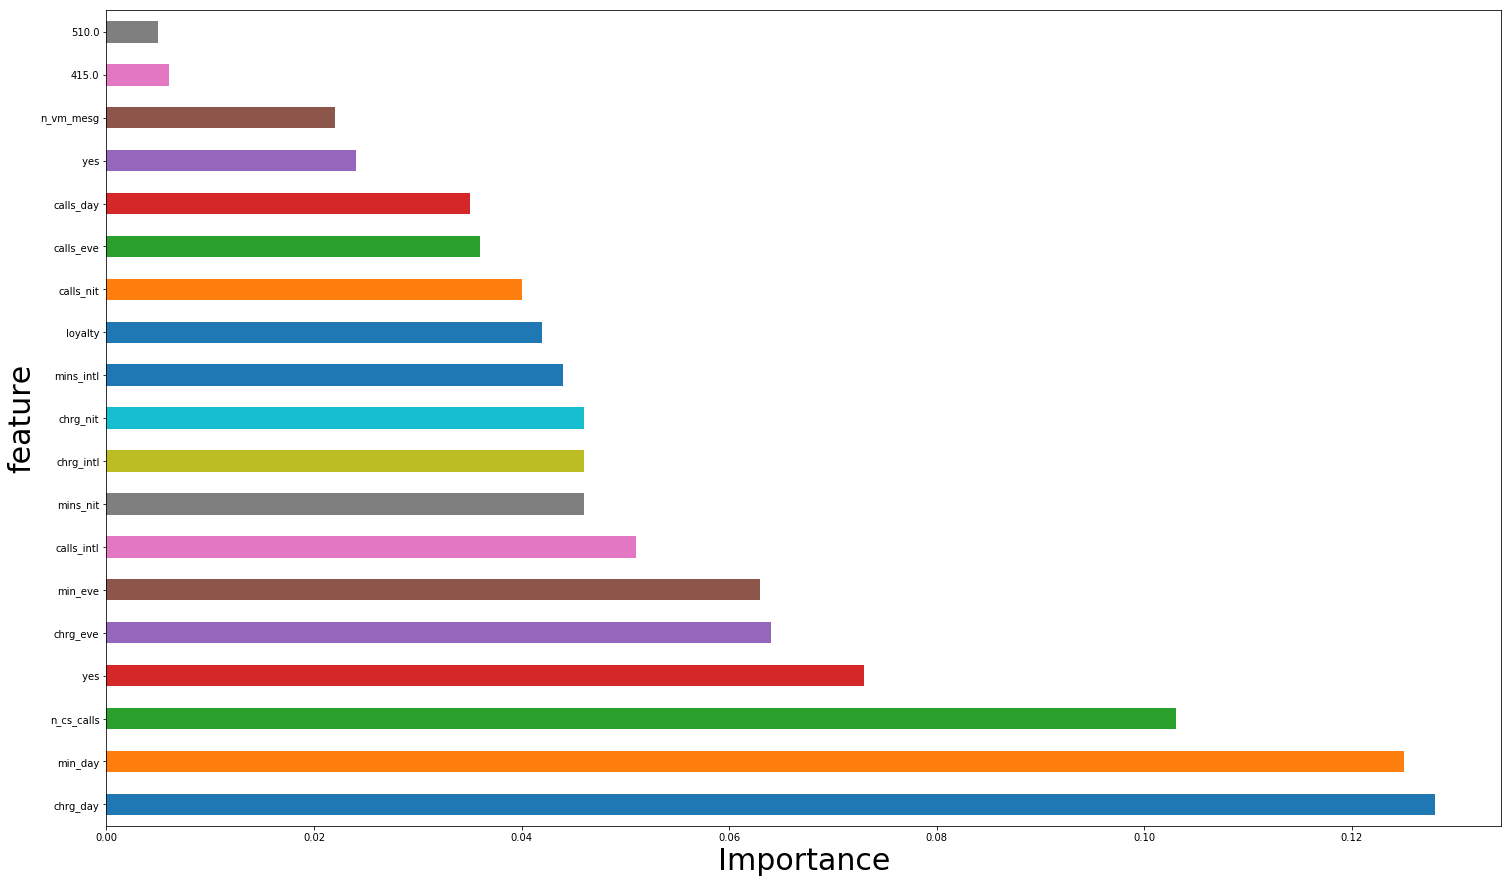

In [314]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

f = plt.figure(figsize = (25,15))
plt.xlabel("Importance", fontsize= 30)
plt.ylabel("FEATURES ", fontsize= 30)
importances['importance'].plot(kind = 'barh')

In [315]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [316]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print('    <---  Logistic Regression with cross-validation  --->     ')
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring = "accuracy")
acc_log= scores.mean()*100
print('Accuracy = '+format(acc_log)+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,y_pred))

    <---  Logistic Regression with cross-validation  --->     
Accuracy = 85.97142857142858%
Std. dev.= 0.71%
****************** Confusion MAtrix ********************
[[1271   22]
 [ 173   34]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1293
          1       0.61      0.16      0.26       207

avg / total       0.84      0.87      0.84      1500



In [317]:
from sklearn.linear_model import SGDClassifier
# stochastic gradient descent (SGD) learning
sgd = SGDClassifier(max_iter=10, tol=None, alpha=.01)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

scores = cross_val_score(sgd, X_train, y_train, cv=10, scoring = "accuracy")
acc_sgd= scores.mean()*100

print('    <---  SGD Classifier with cross-validation  --->     ')
print('Accuracy = '+format(acc_sgd)+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  SGD Classifier with cross-validation  --->     
Accuracy = 78.57142857142858%
Std. dev.= 21.25%
****************** Confusion MAtrix ********************
[[1293    0]
 [ 207    0]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.86      1.00      0.93      1293
          1       0.00      0.00      0.00       207

avg / total       0.74      0.86      0.80      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [318]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
a_knn= scores.mean()*100

print('    <---  KNN Classifier with cross-validation  --->     ')
print('Accuracy = '+format(a_knn)+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  KNN Classifier with cross-validation  --->     
Accuracy = 86.02857142857144%
Std. dev.= 1.39%
****************** Confusion MAtrix ********************
[[1244   49]
 [ 137   70]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1293
          1       0.59      0.34      0.43       207

avg / total       0.86      0.88      0.86      1500



In [319]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)

scores = cross_val_score(gaussian, X_train, y_train, cv=10, scoring = "accuracy")
a_gauss= scores.mean()*100

print('    <---  Naive Bayes Classifier with cross-validation  --->     ')
print('Accuracy = '+format(a_gauss)+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  Naive Bayes Classifier with cross-validation  --->     
Accuracy = 86.85714285714286%
Std. dev.= 1.42%
****************** Confusion MAtrix ********************
[[1194   99]
 [ 102  105]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1293
          1       0.51      0.51      0.51       207

avg / total       0.87      0.87      0.87      1500



In [320]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)
scores = cross_val_score(gaussian, X_train, y_train, cv=10, scoring = "accuracy")
a_per= scores.mean()*100

print('    <---  Perceptron with cross-validation  --->     ')
print('Accuracy = '+format(a_per)+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  Perceptron with cross-validation  --->     
Accuracy = 86.85714285714286%
Std. dev.= 1.42%
****************** Confusion MAtrix ********************
[[1254   39]
 [ 177   30]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      1293
          1       0.43      0.14      0.22       207

avg / total       0.82      0.86      0.82      1500



In [322]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

scores = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring = "accuracy")
a_svc= scores.mean()*100

print('    <---  Linear  SVC with cross-validation  --->     ')
print('Accuracy = '+format(round(a_svc,2))+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  Linear  SVC with cross-validation  --->     
Accuracy = 71.43%
Std. dev.= 28.5%
****************** Confusion MAtrix ********************
[[1293    0]
 [ 206    1]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.86      1.00      0.93      1293
          1       1.00      0.00      0.01       207

avg / total       0.88      0.86      0.80      1500



In [323]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)


scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")
a_dt= scores.mean()*100

print('    <---  Decision Tree with cross-validation  --->     ')
print('Accuracy = '+format(round(a_dt,2))+ '%')
print('Std. dev.= '+format(round(scores.std()*100,2))+ '%')
print('****************** Confusion MAtrix ********************')
print(confusion_matrix(y_test,Y_pred))
print('\n*************** Classification Repot *****************')
print(classification_report(y_test,Y_pred))

    <---  Decision Tree with cross-validation  --->     
Accuracy = 90.83%
Std. dev.= 0.76%
****************** Confusion MAtrix ********************
[[1223   70]
 [  67  140]]

*************** Classification Repot *****************
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1293
          1       0.67      0.68      0.67       207

avg / total       0.91      0.91      0.91      1500



In [324]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [a_svc, a_knn, acc_log, a_rf, a_gauss, a_per, acc_sgd, a_dt]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')

print("Standard deviation in accuracies of Random Forest with cross validation is  " +format(a_rf.std()))

result_df

Standard deviation in accuracies of Random Forest with cross validation is  0.0


,Model
Score,
94.228571,Random Forest
90.828571,Decision Tree
86.857143,Naive Bayes
86.857143,Perceptron
86.028571,KNN
85.971429,Logistic Regression
78.571429,Stochastic Gradient Decent
71.428571,Support Vector Machines


# Hyperparameter tuning (Random Forest with Gridsearch)

In [87]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_estimators=10, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)


In [88]:
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

In [ ]:

clf.fit(X_train, y_train)


In [ ]:
clf.bestparams## HyperParameter Tuning

In [45]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators= 700, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

scores  = cross_val_score(random_forest,X_train,y_train, cv= 10, scoring='accuracy')
print("Accuracy: ", round(scores.mean(),4)*100,"%")

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
print(confusion_matrix(y_test, Y_prediction))
print(classification_report(y_test, Y_prediction))

Accuracy:  95.6 %
oob score: 95.6 %
[[1283   10]
 [  50  157]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1293
          1       0.94      0.76      0.84       207

avg / total       0.96      0.96      0.96      1500



# Neural Network (Multiple Layered Perceptron)

In [325]:
from sklearn.neural_network import MLPClassifier
# Classification using Multi-layer perceptron 
ann = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                    hidden_layer_sizes = (5, 2), random_state = 1)
ann = ann.fit(X_train, y_train)
prediction = ann.predict(X_test)


scores  = cross_val_score(random_forest,X_train,y_train, cv= 10, scoring='accuracy')
print("Accuracy : ", round(scores.mean(),4)*100,"%")
print("Std.dev. : ", round(scores.std()*100,4),"%")

print("\t\t\t\t<-------- Confusion Matrix -------->\n\t\t\t\t",confusion_matrix(y_test, prediction))
print("<-------- Classification Report -------->\n",classification_report(y_test, prediction))

Accuracy :  94.19999999999999 %
Std.dev. :  0.7346 %
				<-------- Confusion Matrix -------->
				 [[1293    0]
 [ 207    0]]
<-------- Classification Report -------->
              precision    recall  f1-score   support

          0       0.86      1.00      0.93      1293
          1       0.00      0.00      0.00       207

avg / total       0.74      0.86      0.80      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Hyperparameter tuning (MLP Classifer with Gridsearch)

In [338]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(ann, parameter_space, n_jobs=-1, cv=3, scoring="accuracy")


clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [339]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

In [54]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.857 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.857 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.857 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.857 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.858 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.860 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.858 (+/-0.002) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 

In [351]:
print("Accuracy : ", round(clf.best_score_,4)*100,"%")
print(classification_report(y_test, clf.predict(X_test)))

Accuracy :  86.63 %
             precision    recall  f1-score   support

          0       0.88      0.99      0.93      1293
          1       0.67      0.13      0.21       207

avg / total       0.85      0.87      0.83      1500



In [353]:
clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [357]:
from sklearn.neural_network import MLPClassifier
# Classification using Multi-layer perceptron 
ann_f = MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
ann_f = ann.fit(X_train, y_train)
pred_f = ann.predict(X_test)


scores  = cross_val_score(ann_f,X_train,y_train, cv= 10, scoring='accuracy')
print("Accuracy : ", round(scores.mean(),4)*100,"%")
print("Std.dev. : ", round(scores.std()*100,4),"%")

print("\t\t\t\t<-------- Confusion Matrix -------->\n\t\t\t\t",confusion_matrix(y_test, pred_f))
print("<-------- Classification Report -------->\n",classification_report(y_test, pred_f))

Accuracy :  85.94000000000001 %
Std.dev. :  0.6857 %
				<-------- Confusion Matrix -------->
				 [[1293    0]
 [ 207    0]]
<-------- Classification Report -------->
              precision    recall  f1-score   support

          0       0.86      1.00      0.93      1293
          1       0.00      0.00      0.00       207

avg / total       0.74      0.86      0.80      1500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
